<a href="https://colab.research.google.com/github/chrishuskey/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/Chris_Huskey_Sprint_Challenge_Unit_1_Sprint_3_Linear_Algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

In [0]:
# Import functions used in this notebook:
from math import sqrt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# For standardization and PCA:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# For k-means clustering:
from sklearn.cluster import KMeans 

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

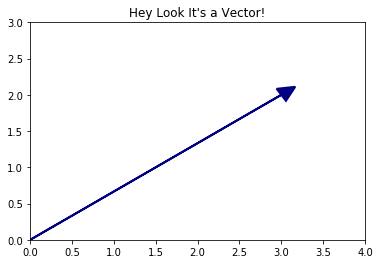

In [101]:
# Create the vector as an np array:
a1 = np.array([3, 2])

# Plot it!
plt.arrow(0, 0, a1[0], a1[1], linewidth=2, color='navy', head_width=0.2, head_length=0.2)
plt.title("Hey Look It's a Vector!")
plt.xlim(0, a1[0] + 1)
plt.ylim(0, a1[1] +1)
plt.show()

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [102]:
b1 = np.array([17, -4, -2, 1])

b1_norm = sqrt(np.dot(b1, b1))  # Hand calc:  ||b|| = sqrt(17^2 + (-4)^2 + (-2)^2 + 1^2) = sqrt(310) = ~17.6
print('The norm (magnitude) of vector b is:', round(b1_norm, 2))
print('\nQ:  What does the norm of a vector represent?\n')
print('Answer:  The norm (magnitude) of a vector can be thought of as its "length."')
print('Its norm is also equal to its dot product with itself, i.e.: ||b|| = b · b as in the comment above.')

The norm (magnitude) of vector b is: 17.61

Q:  What does the norm of a vector represent?

Answer:  The norm (magnitude) of a vector can be thought of as its "length."
Its norm is also equal to its dot product with itself, i.e.: ||b|| = b · b as in the comment above.


## 1.3 Find $\vec{c} \cdot \vec{d}$ - Are these vectors orthogonal? Why or why not?

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [103]:
c1 = np.array([3, 7, -2, 12])
d1 = np.array([9, -7, 4, 6])

# Check for orthogonality:  2 vectors are orthogonal <-IFF-> their dot product = 0.
# Hand calc:  c1 · d1 = [3(9) + 7(-7) + 4(-2) + 12(6)] = [27 - 49 - 8 + 72] = 42
print('These vectors are orthogonal:', np.dot(c1, d1) == 0)
print('Because their dot product is:', np.dot(c1, d1))

These vectors are orthogonal: False
Because their dot product is: 42


## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [104]:
E = np.array([[7, 4, 2], [1, 3, -1], [2, 6, -4]])
print('Matrix E:\n')
E

Matrix E:



array([[ 7,  4,  2],
       [ 1,  3, -1],
       [ 2,  6, -4]])

In [105]:
print('E_T (transpose of E):\n')
np.transpose(E)

E_T (transpose of E):



array([[ 7,  1,  2],
       [ 4,  3,  6],
       [ 2, -1, -4]])

In [106]:
print('E_-1 (inverse of E):\n')
E_inv = np.linalg.inv(E)

# Check answer:  A matrix multiplied by its inverse is the identity matrix:
id_matrix_3x3 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
check_inv = id_matrix_3x3 == np.round(np.matmul(E, E_inv), 10)
assert np.all(check_inv)  # Return error only if E(E_-1) != 3x3 identity matrix

# Display E_-1:
E_inv

E_-1 (inverse of E):



array([[ 0.17647059, -0.82352941,  0.29411765],
       [-0.05882353,  0.94117647, -0.26470588],
       [ 0.        ,  1.        , -0.5       ]])

## 1.5 Find $|F|$ - What is one reason why the determinant of a matrix would be 0? 

\begin{align}
F = 
\begin{bmatrix}
    2 & -2 & 5 \\
    4 & 1 & 10 \\
    12 & 6 & 30
\end{bmatrix}
\end{align}

In [107]:
F = np.array([[2, -2, 5], [4, 1, 10], [12, 6, 30]])
print('The determinant of matrix F is:', np.linalg.det(F), '\n')
print('Reason:  This is because two of its columns (columns 0 and 2, the first and')
print('third columns) are linearly dependent: they are the same [1, 2, 5]')
print('vector, just scaled by different scalars (2 and 5).')

The determinant of matrix F is: 0.0 

Reason:  This is because two of its columns (columns 0 and 2, the first and
third columns) are linearly dependent: they are the same [1, 2, 5]
vector, just scaled by different scalars (2 and 5).


We can confirm the above by reducing the matrix to row echelon form with Gaussian elimination (row reduction):

Original matrix F:

\begin{align}
F = 
\begin{bmatrix}
    2 & -2 & 5 \\
    4 & 1 & 10 \\
    12 & 6 & 30
\end{bmatrix}
\end{align}

Via Gaussian elimination (row reduction, by hand) we can reduce this to:

\begin{align}
F = 
\begin{bmatrix}
    1 & 0 & 2.5 \\
    0 & 1 & 0 \\
    0 & 0 & 0
\end{bmatrix}
\end{align}

...the third row of which (all zeros) shows that one of F's columns is a linearly dependent (redundant -- same info as first column) vector that we should get rid of if possible.

# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, sample variance, and sample standard deviation for both the number of customers and inches of new snow for the week. Remember that on SCs you can use library functions, dataframes, .describe(), etc. 



In [108]:
customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

# Make a dataframe with this data that we can work with (even) more easily:
ski_dict = {'customers': customers, 'snow': snow}
ski_data = pd.DataFrame(ski_dict, dtype='float')

# Print out the answers (mean, variance and std. dev. for both features):
print('Customers per day last week:')
print('• Mean:', round(ski_data['customers'].mean(), 1))
# Sample data --> set degrees of freedom to 1 (not 0) for both sample variance
# and sample std. dev. calcs.
print('• Variance:', round(ski_data['customers'].var(ddof=1), 1), '(unit: customers^2)')  
print('• Standard deviation:', round(ski_data['customers'].std(ddof=1), 1), 'customers\n')

print('Inches of snow per day last week:')
print('• Mean:', round(ski_data['snow'].mean(), 1))
# Sample data --> ddof=1, same as above.
print('• Variance:', round(ski_data['snow'].var(ddof=1), 1), '(unit: inches^2)')
print('• Standard deviation:', round(ski_data['snow'].std(ddof=1), 1), 'inches')

Customers per day last week:
• Mean: 1135.7
• Variance: 98761.9 (unit: customers^2)
• Standard deviation: 314.3 customers

Inches of snow per day last week:
• Mean: 2.7
• Variance: 8.6 (unit: inches^2)
• Standard deviation: 2.9 inches


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

**Answer:**  

No, they are not comparable.

Reason:  Because of the way variance is calculated (x_i - x_sample_mean as the numerator), the variance output number will be greater or much greater for data with great absolute values.  --> e.g., Variance for the customers numbers will be much greater than that for the inches of snow numbers, which we can see above is the case here.  Besides, the variance output numbers are in customers^2 (persons^2...) and inches^2 of snow as their units, which means comparing these variance numbers (instead of the standardized --> comparable standard deviation numbers) not very helpful...

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [109]:
# Calculate and display the covariance matrix for our customers and snow features:
cov_matrix_ski = ski_data.cov()
print('Covariance of # customers per day and inches of snow per day last week:\n', 
      round(cov_matrix_ski.loc['customers']['snow'], 1))

# Display the covariance matrix:
cov_matrix_ski

Covariance of # customers per day and inches of snow per day last week:
 670.2


,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


In [110]:
# Just because correlation is more useful than covariance in this case, 
# let's also calculate and display the correlation coefficient (r):
corr_matrix_ski = ski_data.corr()
print('Correlation between # customers per day and inches of snow per day last week:\n r = ', 
      round(corr_matrix_ski.loc['customers']['snow'], 2))

# Display the matrix of correlation coefficients:
corr_matrix_ski

Correlation between # customers per day and inches of snow per day last week:
 r =  0.73


,customers,snow
customers,1.000000,0.728463
snow,0.728463,1.000000


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. 

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [0]:
# Let me get you some data to start you off.
import pandas as pd

food_data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

food_df = pd.DataFrame(food_data)

In [0]:
country_to_number = {'England': 1, 'Wales': 2, 'Scotland': 3, 'North Ireland': 4}
food_df['Country'] = food_df['Country'].replace(country_to_number)

In [113]:
food_df

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,1,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,2,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,3,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,4,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [114]:
food_df_no_x = food_df.copy().drop(columns=['Country'])
food_df_no_x

,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. 

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [0]:
# Libraries:  Already imported PCA from scikit-learn at top of this notebook.

# 1) Separate your data into X and Y, variables.
# Done.  But there is no individual target variable... all of them appear to 
# be the target variable (quantity sold? price?) divided by category of food?

# Standardize our data first:
# 2) Center each column at 0 by subtracting its mean.
# 3) Divide each column by its standard deviation.
scaler = StandardScaler()  # Initialize the standard scaler transformation
Z = scaler.fit_transform(food_df_no_x)

# Create PCA instance -- let's find 2 principal component columns:
pca = PCA(2)

# Fit PCA for our standardized data, splitting fit and transform so we can 
# pull the eigenvectors and eigenvalues in between:
pca.fit(Z)

# Get the eigenvectors (PCA components) and eigenvalues:
eigenvectors = pca.components_
eigenvalues = pca.explained_variance_

# And now transform the data to get our PCA results:
PCA_results = pca.transform(Z)

In [116]:
# Print the eigenvectors and eigenvalues for our reference:
print('Eigenvectors:', eigenvectors, '\n')
print('Corresponding eigenvalues:', eigenvalues, '\n')

Eigenvectors: [[-0.24572131  0.28562914 -0.26481055 -0.28611787 -0.12719487 -0.2811012
   0.09775901 -0.26544997 -0.28708628 -0.12073819 -0.25767815 -0.27890521
  -0.17843996 -0.27747513  0.22771961 -0.25509484 -0.25275834]
 [ 0.24708041 -0.07716993  0.13610704 -0.01100602 -0.40054501 -0.13684092
  -0.45468785 -0.0964863  -0.09282322  0.41036129 -0.1539603   0.08174644
  -0.32902948 -0.13773847  0.29323981  0.23231808  0.21105701]] 

Corresponding eigenvalues: [15.48765084  5.63749203] 



In [117]:
PCA_results

array([[-0.95448984,  0.32831832],
       [-4.52095094, -1.73537967],
       [ 0.48797835,  3.23367195],
       [ 4.98746242, -1.8266106 ]])

In [0]:
# Add PCA 1 and PCA 2 features as additional columns in our dataset:
food_df['PCA_1'] = PCA_results[:, [0]]
food_df['PCA_2'] = PCA_results[:, [1]]

# And add a column with the country names for easier reference/understanding:
number_to_country = {1: 'England', 2: 'Wales', 3: 'Scotland', 4: 'North Ireland'}
food_df['Country_Name'] = food_df['Country'].copy().replace(number_to_country)

In [0]:
# And make an easily viewable PCA features-only dataset in case easier to work with:
food_df_PCAs = food_df.copy()[['Country', 'Country_Name', 'PCA_1', 'PCA_2']]

In [120]:
food_df_PCAs

,Country,Country_Name,PCA_1,PCA_2
0,1,England,-0.954490,0.328318
1,2,Wales,-4.520951,-1.735380
2,3,Scotland,0.487978,3.233672
3,4,North Ireland,4.987462,-1.826611


In [121]:
food_df

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery,PCA_1,PCA_2,Country_Name
0,1,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54,-0.954490,0.328318,England
1,2,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64,-4.520951,-1.735380,Wales
2,3,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62,0.487978,3.233672,Scotland
3,4,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41,4.987462,-1.826611,North Ireland


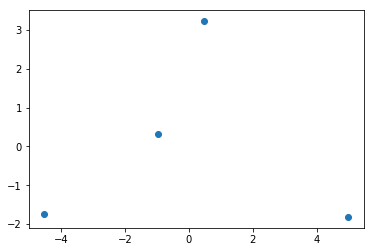

In [122]:
# Plot PCA 1 and PCA 2 on a chart:
plt.scatter(food_df['PCA_1'], food_df['PCA_2'])
plt.show()

# Not seeing any clear relationship/findings from this... but PCA is only data 
# prep. to reduce the dimensionality.  Next we could work with this PCA data as 
# our input for different machine learning models that might be helpful for 
# finding some relationship/meaning in this PCA results data that we maybe 
# can't easily see yet in the raw data below.

## 3.3 What are Eigenvalues and Eigenvectors? -In general, not just in PCA.

Eigenvectors are vectors that are not transformed by a given linear transformation function: the vector direction stays the same (though the vector may be scaled by a scalar).  The eigenvector is scaled by some scalar λ in the linear transformation (λ can be 1 -- i.e., the eigenvector stays exactly the same after going through the transformation function -- or any other scalar), and λ here is called the eigenvalue for that eigenvector.

Every linear transformation function (e.g., one represented by a matrix as we have been doing for efficiency) has one or more eigenvectors specific to that function, and each of these eigenvectors has its corresponding λ eigenvalue (the scalar that eigenvector is scaled by during the transformation).

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. 

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [0]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')

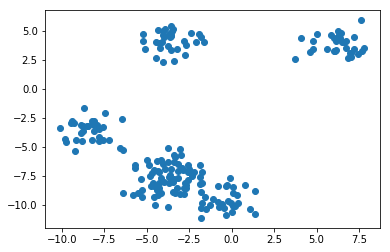

In [124]:
# Let's first plot the points to see what the data looks like, and 
# see how many clusters we probably want to find with the K-means classification:
plt.scatter(points['x'], points['y'])
plt.show()

In [0]:
# n-clusters: Looks like there are 5 relatively distinct/clear clusters in the simple 
# scatter plot above --> let's run k-means clustering with n-clusters=5:

# Libraries:  scikit-learn KMeans already imported at top of this notebook.

k_means = KMeans(n_clusters=5) 
# n_clusters:  Based on the above quick scatter plot, 
# there appear to be 5 relatively distinct clusters --> let's set n_clusters=5.
# random_state:  In this case we don't need deterministic random number 
# generation for the centroid initialization #s, so use default random_state=None.)
k_means.fit(points)
labels = k_means.labels_

# Add K-means cluster numbers (labels) to our dataframe as additional columns:
points['clusters'] = pd.Series(labels)

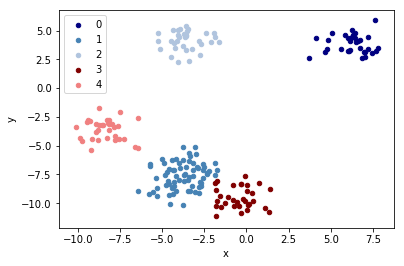

In [126]:
colors={0: 'navy', 1: 'steelblue', 2: 'lightsteelblue', 3: 'maroon', 4: 'lightcoral'}

# Plot the clusters, with each identified cluster as a different color:
fig, ax = plt.subplots()
groupby_clusters = points.groupby('clusters')
for key, cluster in groupby_clusters:
  cluster.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.legend()
plt.show()

# Stretch Goals (AKA how to get a 3):

Complete the stretch goals for each section in order to get a 3 on that section.

## Parts 1 & 2 (do all of the following): 
  - Comment your code well with both markdown and inline comments where appropriate
  - Show your work with code and possibly LaTeX 
  - Justify your answers particularly well to show advanced mastery of this section

## Part 3 (do all of the following): 
 - Create a Scree Plot to show the Proportion of Explained Variance of each Principal Component (more than the first two)
    - If you want to include a the cumulative proportion of explained variance, you might be interested in this NumPy Function: [numpy.cumsum](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cumsum.html)
 - Give a top-notch explanation of eigenvalues and eigenvectors. Feel free to any materials, images, code, graphs, LaTeX, etc. to spruce up your answer.

## Part 4 (do all of the following):
- Justify your choice of k, both visually (scatterplot) and mathematically (elbow plot).